# Proyek Analisis Data: Nama dataset
- Nama:Makrufiah Sakatri
- Email:maruphiks18@gmail.om
- Id Dicoding:

## Menentukan Pertanyaan Bisnis

1. Bagaimana pola pengguna biasa dan pelanggan pada setiap jam?
2. Apakah ada hubungan cuaca/iklim terhadap pengguna tiap jam?
3. Apakah ada hubungan antara jenis pengguna terhadap cuaca?

## Menyiapkan semua library yang dibuthkan

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [ ]:
#memanggil data ke variabel
hour = pd.read_csv('hour.csv')
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
#data yang akan digunakan = season,hr,weekday,wethersit,cnt,casual,cnt
drop_coloumn = ['instant', 'dteday','yr','mnth','workingday', 'holiday']
hour=hour.drop(columns=drop_coloumn)
hour

,season,hr,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,6,1,0.24,0.2879,0.81,0.0000,3,13,16
1,1,1,6,1,0.22,0.2727,0.80,0.0000,8,32,40
2,1,2,6,1,0.22,0.2727,0.80,0.0000,5,27,32
3,1,3,6,1,0.24,0.2879,0.75,0.0000,3,10,13
4,1,4,6,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
17374,1,19,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,1,20,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,1,21,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,1,22,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [ ]:
#mengganti value pada tabel
hour = hour.rename(columns={'hr': 'start_hour'})
rename_season = {1:'spring',2 : 'summer', 3 :'fall', 4 : 'winter' }
rename_weathersit = {1:'clear cloudy',2 : 'mist cloudy', 3 :'light rain', 4 : 'heavy rain' }
rename_day = {0:'sunday',1 : 'monday', 2 :'tuesday', 3 : 'wednesday', 4 : 'thursday', 5 : 'friday', 6: 'saturday'}
hour['season'] = hour['season'].replace(rename_season)
hour['weathersit'] = hour['weathersit'].replace(rename_weathersit)
hour['weekday'] = hour['weekday'].replace(rename_day)
hour
hour.to_csv("data_bike.csv", index=False)

In [ ]:
#melihat isi  nilai beberapa kolom
print("value coloumns season = ", hour['season'].unique())
print("value coloumns weekday = ", hour['weekday'].unique())
print("value coloumns weathersit = ", hour['weathersit'].unique())

value coloumns season =  ['spring' 'summer' 'fall' 'winter']
value coloumns weekday =  ['saturday' 'sunday' 'monday' 'tuesday' 'wednesday' 'thursday' 'friday']
value coloumns weathersit =  ['clear cloudy' 'mist cloudy' 'light rain' 'heavy rain']


In [ ]:
#jumlah baris dan kolom
hour.shape

(17379, 11)

In [ ]:
#melihat isi kolom
hour.columns

Index(['season', 'start_hour', 'weekday', 'weathersit', 'temp', 'atemp', 'hum',
       'windspeed', 'casual', 'registered', 'cnt'],
      dtype='object')

### Assessing Data

In [ ]:
#cek null
hour.isnull().sum()

season        0
start_hour    0
weekday       0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
#cek duplicated
hour.duplicated().sum()

3

In [ ]:
hour[hour.duplicated()] #tidak bermasalah karena hanya duplicated beberapa kolom saja

,season,start_hour,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
8126,winter,6,saturday,clear cloudy,0.24,0.2576,0.65,0.1045,1,10,11
9867,spring,4,tuesday,clear cloudy,0.22,0.2727,0.64,0.0000,0,2,2
13727,fall,4,tuesday,clear cloudy,0.66,0.6061,0.83,0.0896,0,6,6


### Cleaning Data

In [ ]:
#tidak ada data yang didrop

## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
hour_count = hour['start_hour'].value_counts()
hour['start_hour'].value_counts().sort_index(ascending=True)
#melihat jumlah pengguna setiap jamnya

0     726
1     724
2     715
3     697
4     697
5     717
6     725
7     727
8     727
9     727
10    727
11    727
12    728
13    729
14    729
15    729
16    730
17    730
18    728
19    728
20    728
21    728
22    728
23    728
Name: start_hour, dtype: int64

In [ ]:
hour_sum_user = hour.groupby('start_hour')['cnt'].sum().reset_index()
print("\nmin =\n", hour_sum_user.loc[hour_sum_user['cnt'].idxmin()])
print("----------------------------------------------------------")
print("\nmax =\n", hour_sum_user.loc[hour_sum_user['cnt'].idxmax()])
print("----------------------------------------------------------")
print("mean = ",hour['start_hour'].value_counts().mean())
#pengguna banyak menggunakan sepeda pada sore pukul 16-17, sedikit pada dini hari jam 3-4


min =
 start_hour       4
cnt           4428
Name: 4, dtype: int64
----------------------------------------------------------

max =
 start_hour        17
cnt           336860
Name: 17, dtype: int64
----------------------------------------------------------
mean =  724.125


In [ ]:
col_sum = ['casual','registered']
byhour = hour.groupby('start_hour')[col_sum].sum().reset_index()
byhour #jumlah pengguna berdasarkan jenis pengguna tiap jamnya

,index,0
0,casual,620017
1,registered,2672662


In [ ]:
correlation = byhour.corr()
print(correlation)
#terdapat korelasi positif cukup kuat terhadap jumlah pengguna biasa dan pengguna langganan terhadap jam-jam penggunaan sepeda

            start_hour    casual  registered
start_hour    1.000000  0.541087    0.527041
casual        0.541087  1.000000    0.670972
registered    0.527041  0.670972    1.000000


## Visualization & Explanatory Analysis

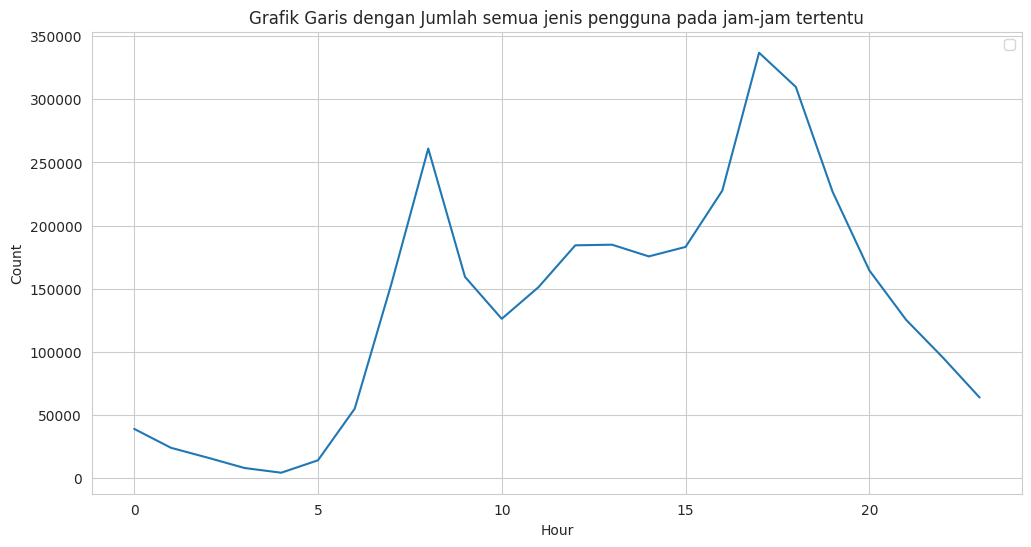

In [ ]:
#Analisis dan Visualisasi
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(x=hour_sum_user['start_hour'], y=hour_sum_user['cnt'], data=hour_sum_user)
plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('Grafik Garis dengan Jumlah semua jenis pengguna pada jam-jam tertentu')
plt.legend()
plt.show()
#Pengguna menggunakan sepeda pada sekitar pukul 8-10 pagi dan 15-20 malam

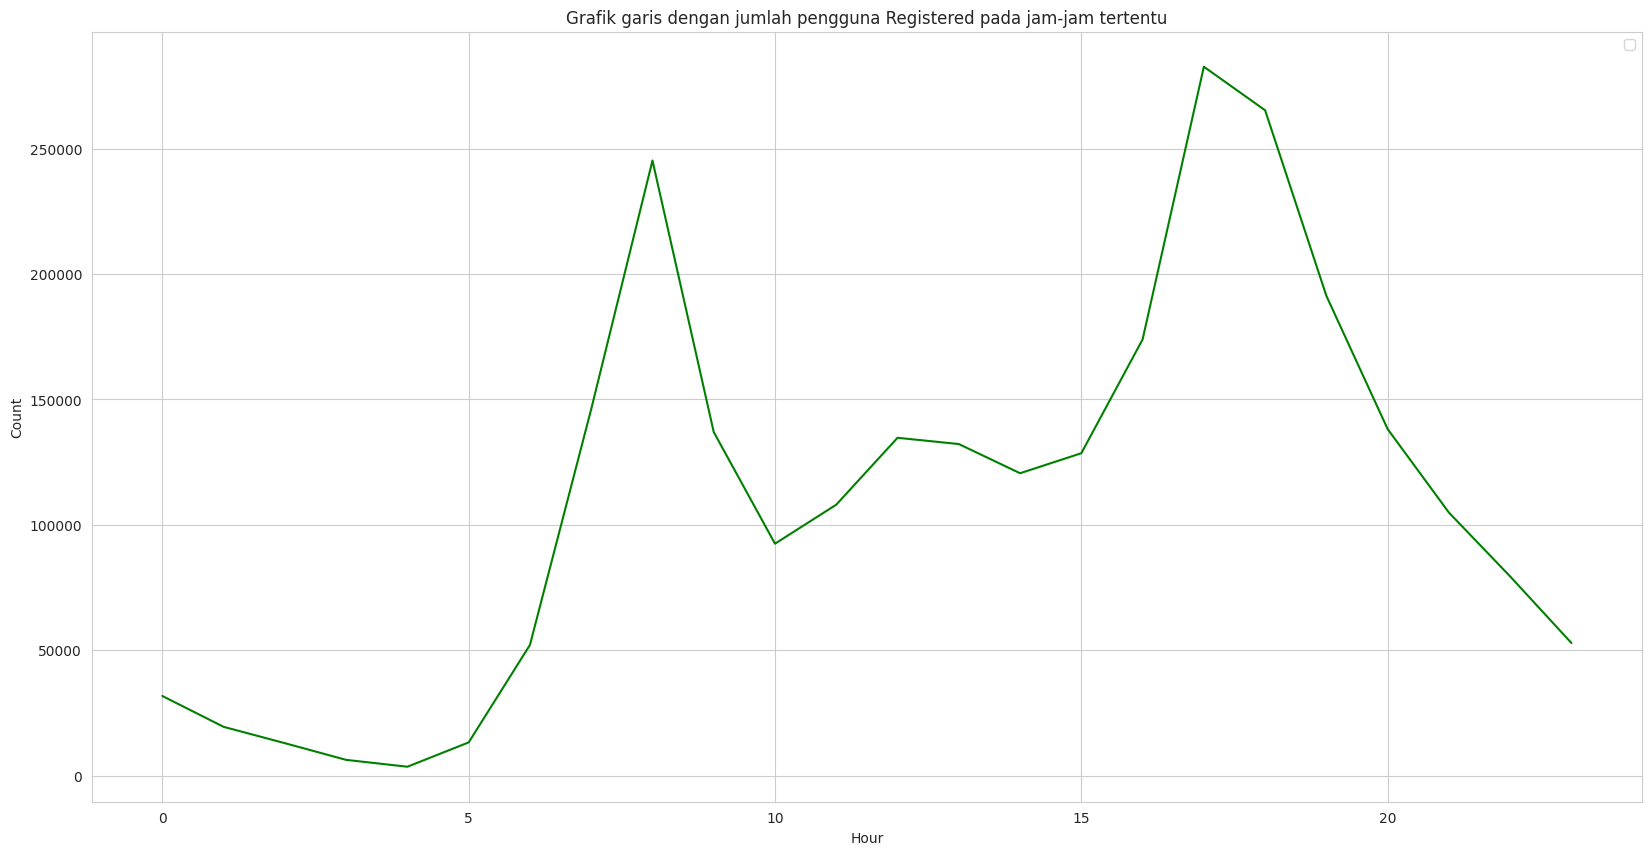

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(20, 10))
sns.lineplot(x=byhour['start_hour'], y=byhour['registered'],color='green')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('Grafik garis dengan jumlah pengguna Registered pada jam-jam tertentu')
plt.legend()
plt.show()
#pengguna langganan menggunakan sepeda 8-10 pagi dan 15-20 malam

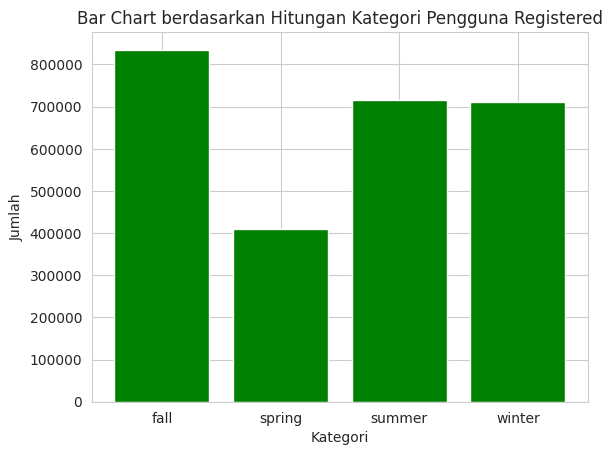

In [ ]:
byseason = hour.groupby('season')[col_sum].sum().reset_index()
byseason
plt.bar(byseason['season'], byseason['registered'], color='green')
plt.xlabel('Kategori')
plt.ylabel('Jumlah')
plt.title('Bar Chart berdasarkan Hitungan Kategori Pengguna Registered')
plt.show()

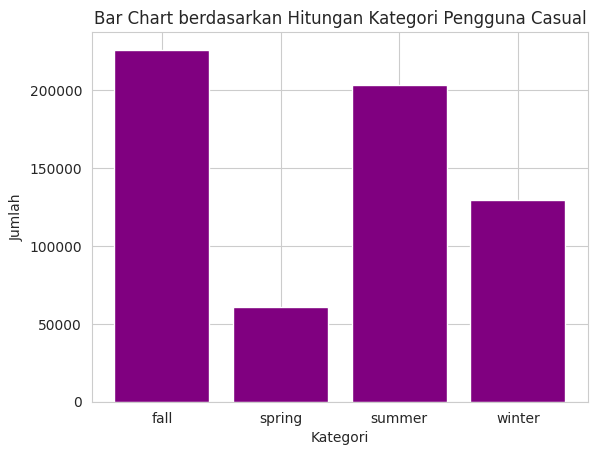

In [ ]:
plt.bar(byseason['season'], byseason['casual'], color='purple')
plt.xlabel('Kategori')
plt.ylabel('Jumlah')
plt.title('Bar Chart berdasarkan Hitungan Kategori Pengguna Casual')
plt.show()
#baik jenis pengguna langganan dan biasa menggunan sepeda pada musim yang sama yaitu gugur dan panas

In [ ]:
byseason = hour.groupby('season')[col_sum].sum().reset_index()

In [ ]:
#jumlah musim
byweather = hour.groupby('weathersit')[col_sum].sum().reset_index()
byweather

,weathersit,casual,registered
0,clear cloudy,462745,1875428
1,heavy rain,8,215
2,light rain,22783,135548
3,mist cloudy,134481,661471


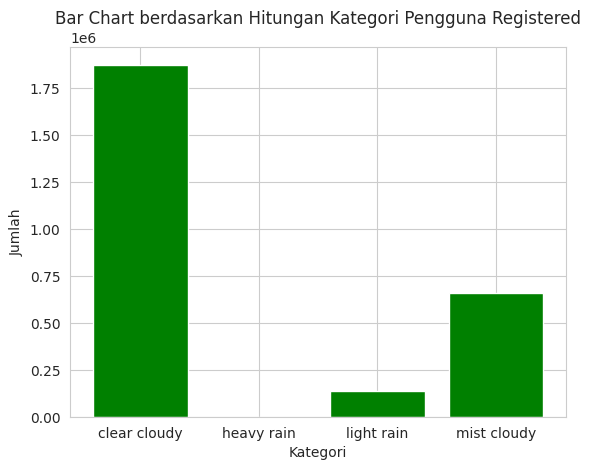

In [ ]:
plt.bar(byweather['weathersit'], byweather['registered'], color = 'green')
plt.xlabel('Kategori')
plt.ylabel('Jumlah')
plt.title('Bar Chart berdasarkan Hitungan Kategori Pengguna Registered')
plt.show()

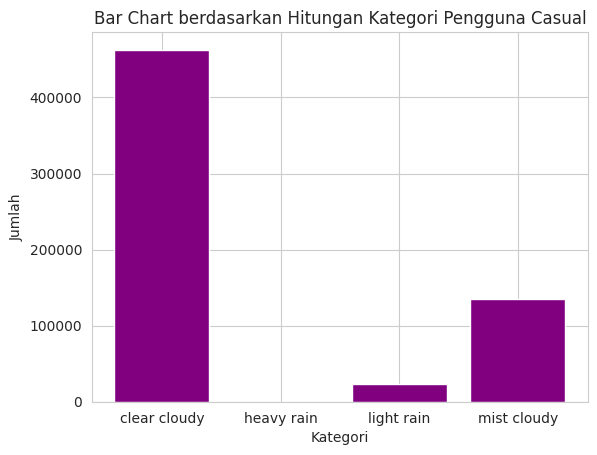

In [ ]:
plt.bar(byweather['weathersit'], byweather['casual'], color='purple')
plt.xlabel('Kategori')
plt.ylabel('Jumlah')
plt.title('Bar Chart berdasarkan Hitungan Kategori Pengguna Casual')
plt.show()
#baik jenis pengguna langganan dan biasa menggunan sepeda pada cuaca yang sama yaitu cerah berawan

In [ ]:
#jumlah hari
byday = hour.groupby('weekday')[col_sum].sum().reset_index()
order_day = ['sunday','monday','tuesday','wednesday','thursday','friday','saturday']
byday['weekday'] = pd.Categorical(byday['weekday'], categories=order_day, ordered=True)
byday = byday.sort_values(by='weekday')
byday

,weekday,casual,registered
3,sunday,140521,303506
1,monday,70784,384719
5,tuesday,57843,411266
6,wednesday,57319,415729
4,thursday,61460,423935
0,friday,78238,409552
2,saturday,153852,323955


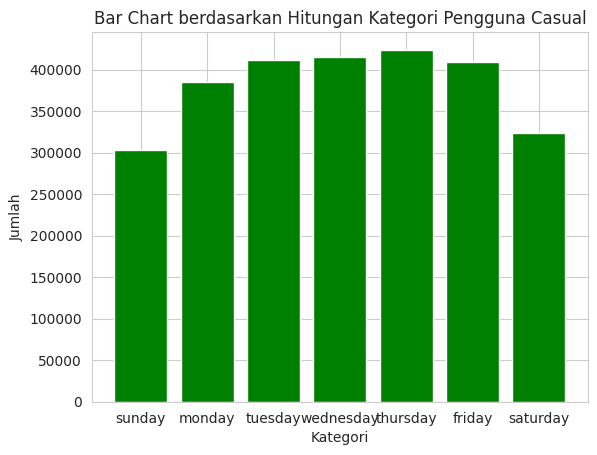

In [ ]:
plt.bar(byday['weekday'], byday['registered'],color='green')
plt.xlabel('Kategori')
plt.ylabel('Jumlah')
plt.title('Bar Chart berdasarkan Hitungan Kategori Pengguna Casual')
plt.show()
#pengguna langganan menggunakan sepeda banyak digunakan pada workingday

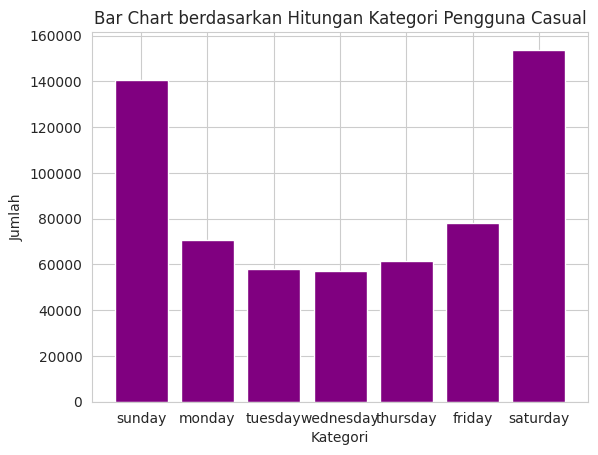

In [ ]:
plt.bar(byday['weekday'], byday['casual'],color = 'purple')
plt.xlabel('Kategori')
plt.ylabel('Jumlah')
plt.title('Bar Chart berdasarkan Hitungan Kategori Pengguna Casual')
plt.show()
#pengguna biasa menggunakan sepeda banyak digunakan pada weekend day

## Conclusion

1. Jumlah pengguna biasa menggunakan sepeda banyak digunakan pada pukul 13.00-17.00 mencapai lebih dari 50.000 pengguna biasa. Sedangkan pengguna langganan menggunakan sepeda banyak digunakan pada 2 waktu yaitu pukul 08.00 mencapai lebih 240.000 dan pukul 17.00-18.00 mencapai lebih 260.000.


2. Pengguna biasa dan langganan memiliki pola terhadap cuaca yang sama dalam menggunakan sepeda yaitu terbanyak digunakan saat cuaca cerah berawan dan tidak ada yang menggunakan sepeda saat cuaca hujan berat.


3.  Pengguna biasa dan langganan memiliki pola terhadap musim yang sama dalam menggunakan sepeda yaitu terbanyak digunakan saat musim gugur dan panas. Namun pengguna pelanggan juga menggunakan saat musim dingin dengan jumlah hampir sama saat musim panas sekitar 710.000 pengguna langganan.


(-) Jumlah pengguna sepeda langganan lebih banyak daripada pengguna sepeda biasa. Pengguna langganan memiliki pola menggunakan sepeda saat working day (monday-friday). Sedangkan pengguna biasa memiliki pola menggunakan sepeda saat weekend day (saturday & sunday)

data yang digunakan hour.csv, link: https://drive.google.com/file/d/1RaBmV6Q6FYWU4HWZs80Suqd7KQC34diQ/view

link streamlit: https://bikeapp-gd6phmrhq4xt9jh4vxjtjr.streamlit.app/